<a href="https://colab.research.google.com/github/PratikChakrabortyaz/Hugging-Face-/blob/main/Audio%20Course/Audio_Course_Unit_3_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets[audio]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system

In [8]:
from datasets import load_dataset
dataset=load_dataset("facebook/voxpopuli","fr",split="train",streaming=True)


In [11]:
ds_head = [next(iter(dataset)) for _ in range(3)]
example = ds_head[-1]
example

{'audio_id': '20200212-0900-PLENARY-fr_20200212-18:11:25_1',
 'language': 2,
 'audio': {'path': 'train_part_0/20200212-0900-PLENARY-fr_20200212-18:11:25_1.wav',
  'array': array([ 3.66210938e-04, -9.15527344e-05, -2.74658203e-04, ...,
         -6.40869141e-04, -7.93457031e-04, -9.15527344e-04]),
  'sampling_rate': 16000},
 'raw_text': 'Notre délégation défendra la lutte contre les écarts salariaux à travail égal, contre les cyberviolences, les mariages forcés et les mutilations génitales.',
 'normalized_text': 'notre délégation défendra la lutte contre les écarts salariaux à travail égal contre les cyberviolences les mariages forcés et les mutilations génitales.',
 'gender': 'female',
 'speaker_id': '182995',
 'is_gold_transcript': True,
 'accent': 'None'}

In [13]:
!pip install librosa

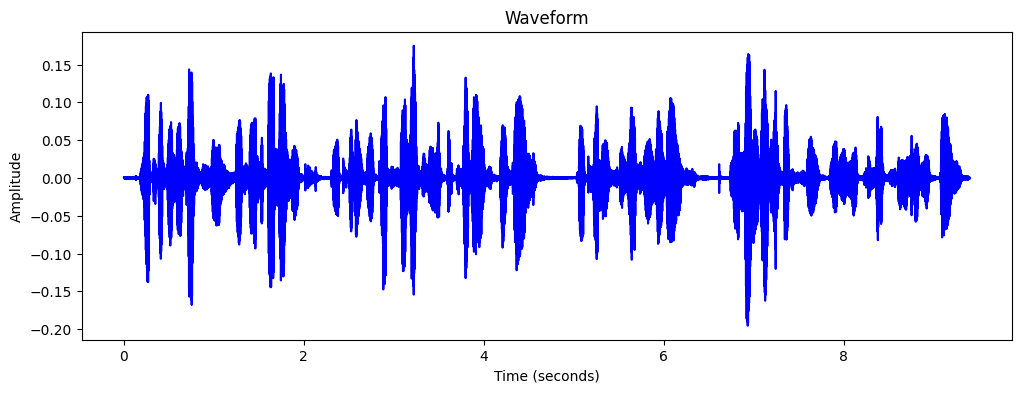

<ipython-input-16-06a24cecf774>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


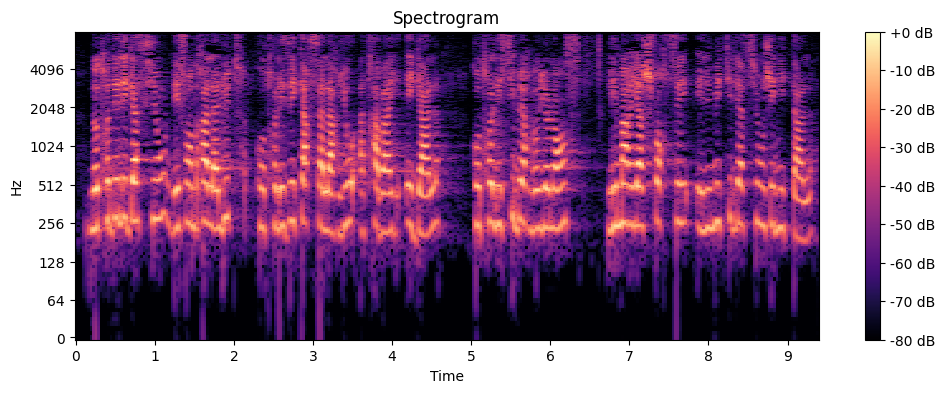

In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

y=example["audio"]["array"]
sr=example["audio"]["sampling_rate"]

plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(y)/sr, len(y)), y, color='blue')
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

plt.figure(figsize=(12, 4))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()


In [22]:
actual_transcription=example["raw_text"]
actual_transcription

'Notre délégation défendra la lutte contre les écarts salariaux à travail égal, contre les cyberviolences, les mariages forcés et les mutilations génitales.'

In [21]:
from transformers import pipeline
pipe=pipeline("automatic-speech-recognition",model="openai/whisper-large-v3-turbo")
predicted_transcription=pipe(example["audio"]["array"])
predicted_transcription

config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.62G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/models/whisper/generation_whisper.py:512: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


{'text': ' Notre délégation défendra la lutte contre les écarts salariaux à travail égal, contre les cyberviolences, les mariages forcés et les mutilations génitales.'}